<h1>Sommaire<span class="tocSkip"></span></h1>
</br>
<div class="toc">
	<ul class="toc-item">
		<li>
			<span>
				<a href="#Import-results" data-toc-modified-id="Import-results-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import results</a>
			</span>
		</li>
		<li>
			<span>
				<a href="#Plot-results" data-toc-modified-id="Plot-results-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot results</a>
			</span>
		</li>
		<li>
			<span>
				<a href="#Select-and-test-best-model" data-toc-modified-id="Select-and-test-best-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Select and test best model</a>
			</span>
			<ul class="toc-item">
				<li><span><a href="#Best-model-:-evaluate-on-Test-set" data-toc-modified-id="Best-model-:-evaluate-on-Test-set-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Best model : evaluate on Test set </a></span>
				</li>
				<li><span><a href="#Import-prediction" data-toc-modified-id="Import-prediction-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Import prediction</a></span>
				</li>
				<li><span><a href="#Evaluate" data-toc-modified-id="Evaluate-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Evaluate</a></span>
				</li>
			</ul>
		</li>
	</ul>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import pickle
import pickle5

from collections import defaultdict
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix

# Import results

In [2]:
# result files
files = glob.glob('results/*')
files

['results\\baseline.csv',
 'results\\lda_matrix.csv',
 'results\\log_reg_bow.csv',
 'results\\log_reg_lda.csv',
 'results\\log_reg_nmf.csv',
 'results\\log_reg_tfidf.csv',
 'results\\rand_forest_bow.csv',
 'results\\rand_forest_lda.csv',
 'results\\rand_forest_nmf.csv',
 'results\\rand_forest_tfidf.csv',
 'results\\svm_bow.csv',
 'results\\svm_lda.csv',
 'results\\svm_nmf.csv',
 'results\\svm_tfidf.csv',
 'results\\univ_sent_encoder',
 'results\\univ_sent_encoder_transformer']

In [3]:
# get data from files
result = defaultdict()
for file in files:
    with open(file, 'r') as f:
        data = f.readlines()[-1].split(';')
        result[data[0]] = [float(data[1]),
                           float(data[2]),
                           float(data[4]),
                           float(data[6]),
                           float(data[8])]

df_data = pd.DataFrame(result, index=['train macro',
                                      'val macro',
                                      'val micro',
                                      'val weighted',
                                      'val samples']).T
df_data = df_data.sort_values(by=['val macro'], ascending=False)
df_data

,train macro,val macro,val micro,val weighted,val samples
univ_sent_encoder transformer,0.622166,0.609222,0.637087,0.655596,0.624022
univ_sent_encoder,0.585017,0.568949,0.595011,0.613252,0.567323
Regression logistique tfidf,0.663868,0.519849,0.574729,0.555532,0.509593
Random forest tfidf,0.642909,0.507199,0.580560,0.529668,0.510441
Random forest bow,0.598817,0.498837,0.579892,0.526869,0.510325
Regression logistique bow,0.878396,0.479663,0.527400,0.520560,0.483546
SVM tfidf,0.612490,0.469197,0.464994,0.507694,0.483436
SVM bow,0.683483,0.435316,0.445958,0.482476,0.473925
SVM lda,0.100744,0.100608,0.105747,0.181269,0.109234
lda matrix,0.095200,0.094873,0.167152,0.152007,0.166967


# Plot results

In [4]:
df_data = df_data.T
df_data

,univ_sent_encoder transformer,univ_sent_encoder,Regression logistique tfidf,Random forest tfidf,Random forest bow,Regression logistique bow,SVM tfidf,SVM bow,SVM lda,lda matrix,SVM nmf,Random forest nmf,Regression logistique nmf,Regression logistique lda,baseline,Random forest lda
train macro,0.622166,0.585017,0.663868,0.642909,0.598817,0.878396,0.612490,0.683483,0.100744,0.095200,0.092283,0.169591,0.015552,0.014932,0.012492,0.083366
val macro,0.609222,0.568949,0.519849,0.507199,0.498837,0.479663,0.469197,0.435316,0.100608,0.094873,0.092507,0.065460,0.015400,0.013921,0.012492,0.009114
val micro,0.637087,0.595011,0.574729,0.580560,0.579892,0.527400,0.464994,0.445958,0.105747,0.167152,0.088236,0.168595,0.038863,0.034461,0.015959,0.017391
val weighted,0.655596,0.613252,0.555532,0.529668,0.526869,0.520560,0.507694,0.482476,0.181269,0.152007,0.177597,0.142377,0.033327,0.028322,0.019437,0.016001
val samples,0.624022,0.567323,0.509593,0.510441,0.510325,0.483546,0.483436,0.473925,0.109234,0.166967,0.092699,0.118212,0.023140,0.016463,0.012597,0.010253


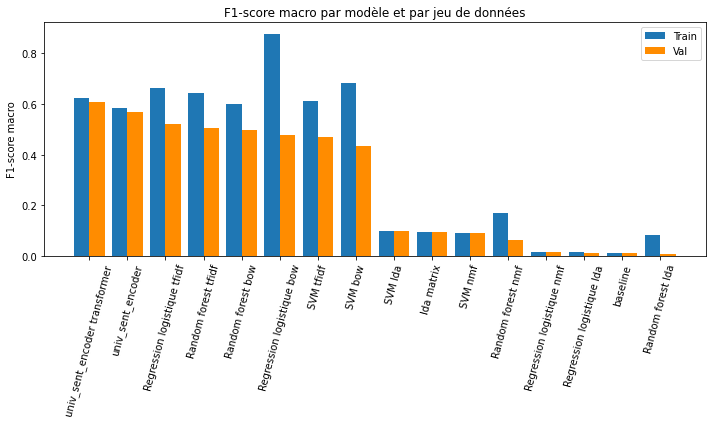

In [5]:
# plot F1_score on train and val set
width = 0.4
x = np.arange(len(df_data.columns))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 0.2, df_data.loc['train macro'], width, label='Train')
ax.bar(x + 0.2, df_data.loc['val macro'],
       width, color='darkorange', label='Val')
ax.set_ylabel('F1-score macro')
ax.set_title('F1-score macro par modèle et par jeu de données')
ax.set_xticks(x)
ax.set_xticklabels(df_data.columns, rotation=75)
ax.legend()
fig.tight_layout()
plt.show()

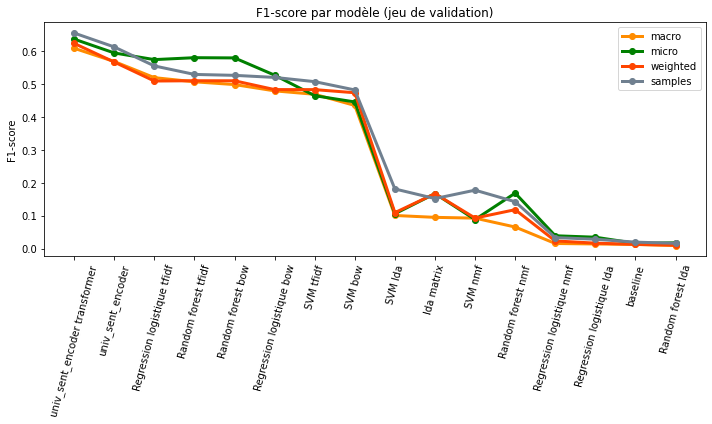

In [6]:
# plot F1_score macro, micro, samples, weighted
x = np.arange(len(df_data.columns))
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, df_data.loc['val macro'], marker='o', markersize=6,
        linewidth=3, color='darkorange', label='macro')
ax.plot(x, df_data.loc['val micro'], marker='o',
        markersize=6, linewidth=3, color='green', label='micro')
ax.plot(x, df_data.loc['val samples'], marker='o', markersize=6,
        linewidth=3, color='orangered', label='weighted')
ax.plot(x, df_data.loc['val weighted'], marker='o',
        markersize=6, linewidth=3, color='slategrey', label='samples')
ax.set_ylabel('F1-score')
ax.set_title('F1-score par modèle (jeu de validation)')
ax.set_xticks(x)
ax.set_xticklabels(df_data.columns, rotation=75)
ax.legend()
fig.tight_layout()
plt.show()

# Select and test best model

Modèle choisi : 
- document embedding par universal sentence encoder, architecture Transformer (V5, google)
- classification multilabels par réseau de neurones dense

## Best model : evaluate on Test set 

In [7]:
# load tags
import pickle
with open('PickleData/RN_usencoder2tags_tags', 'rb') as f:
    tags = pickle.load(f)

In [8]:
#read the pickle file
picklefile = open('test/X_test_filtre.pkl', 'rb')
#unpickle the dataframe
df_X_test = pickle5.load(picklefile)
#close file
picklefile.close()

# post

X_test = df_X_test.drop(columns=['Text']).values  # keep raw post
print('X shape : {}'.format(X_test.shape))

X shape : (34482, 1)


In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

#read the pickle file
picklefile = open('test/Y_test_filtre.pkl', 'rb')
#unpickle the dataframe
df_Y_test = pickle5.load(picklefile)
#close file
picklefile.close()

# tags
# binarize Y whith train binarizer
# binarize Y
mlb = MultiLabelBinarizer()
Y_test = mlb.fit_transform(df_Y_test['tags_filtered'])
print('Y shape : {}'.format(Y_test.shape))

Y shape : (34482, 100)


In [10]:
import tensorflow as tf
def get_dataset(X, Y, batch_size):
    def generator():
        example_count = X.shape[0]
        for i in range(example_count):
            # x = tf.reshape(tf.convert_to_tensor(' '.join(X[i]), dtype=tf.string), (1,)) # convert words list to sentences
            x = tf.reshape((tf.convert_to_tensor(X[i], dtype=tf.string)), (1,))
            x = tf.reshape(encoder(x), (512,))  # encode post
            y = Y[i, :]
            yield x, y

    dataset = tf.data.Dataset.from_generator(generator,
                                             output_types=(
                                                 tf.float64, tf.float64),
                                             output_shapes=(tf.TensorShape([512, ]),
                                                            tf.TensorShape([Y.shape[1], ])))
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(batch_size)
    return dataset

In [11]:
# test dataset
batch_size = 256
test_dataset = get_dataset(X_test, Y_test, batch_size)

In [12]:
import tensorflow as tf
encoder = tf.keras.models.load_model('PickleData/universal-sentence-encoder/DAN')

# load json and create model
json_file = open('PickleData/RN_usencoder2tags_model_config.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("PickleData/RN_usencoder2tag_weights.h5")

In [13]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [14]:
# model.summary()

In [15]:
# predict test set
print('Nombre de tags dans le jeu de test :{}'.format(sum(sum(Y_test))))
y_pred = np.concatenate(np.array([model.predict(data[0]) for data in test_dataset]))
# seuillage
y_seuil = (y_pred > 0.5) * 1
print('Nombre de tags prédits :{}'.format(sum(sum(y_seuil))))

Nombre de tags dans le jeu de test :56250
Nombre de tags prédits :67000


D:\ProgramData\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# evaluate
val_score = f1_score(Y_test, y_seuil, average='macro')
print(classification_report(Y_test, y_seuil))

              precision    recall  f1-score   support

           0       0.30      0.57      0.39      2684
           1       0.44      0.57      0.50       295
           2       0.58      0.58      0.58       472
           3       0.61      0.66      0.63       297
           4       0.91      0.78      0.84       426
           5       0.62      0.60      0.61       237
           6       0.62      0.59      0.61       395
           7       0.44      0.70      0.54       342
           8       0.61      0.62      0.61      2192
           9       0.84      0.68      0.75       875
          10       0.55      0.75      0.63       166
          11       0.48      0.51      0.49       813
          12       0.47      0.69      0.56      5079
          13       0.74      0.64      0.69      1894
          14       0.53      0.72      0.61       151
          15       0.35      0.47      0.40       331
          16       0.24      0.57      0.34       355
          17       0.74    

D:\ProgramData\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# save prediction
np.save('test/best_y_true', Y_test)
np.save('test/best_y_pred', y_pred)

## Import prediction 

In [18]:
# load test set
Y_true = np.load('test/best_y_true.npy')

In [19]:
# load prediction on test set
Y_pred = np.load('test/best_y_pred.npy')

In [20]:
# load tags list
with open('PickleData/RN_usencoder2tags_tags', 'rb') as f:
    tags = pickle.load(f)

## Evaluate 

In [21]:
threshold = 0.5
Y_seuil = (Y_pred > threshold) * 1

In [22]:
# score par tag
report = (classification_report(Y_true, Y_seuil,
                                target_names=tags, zero_division=0))
print(report)

                    precision    recall  f1-score   support

              .net       0.30      0.57      0.39      2684
    actionscript-3       0.44      0.57      0.50       295
              ajax       0.58      0.58      0.58       472
         algorithm       0.61      0.66      0.63       297
           android       0.91      0.78      0.84       426
            apache       0.62      0.60      0.61       237
       apache-flex       0.62      0.59      0.61       395
            arrays       0.44      0.70      0.54       342
           asp.net       0.61      0.62      0.61      2192
       asp.net-mvc       0.84      0.68      0.75       875
              bash       0.55      0.75      0.63       166
                 c       0.48      0.51      0.49       813
                c#       0.47      0.69      0.56      5079
               c++       0.74      0.64      0.69      1894
           caching       0.53      0.72      0.61       151
             cocoa       0.35      0.47

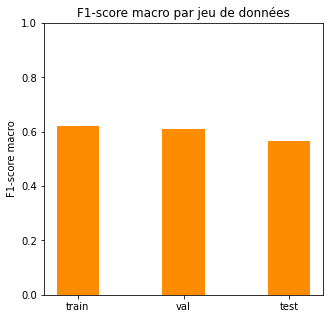

In [23]:
# plot f1-score sur les 3 jeux de données
x = ['train', 'val', 'test']
y = [df_data['univ_sent_encoder transformer'].loc['train macro'],
     df_data['univ_sent_encoder transformer'].loc['val macro'],
     f1_score(Y_true, Y_seuil, average='macro')]

fig, ax = plt.subplots(figsize=(5, 5))
ax.bar(x, y, width, color='darkorange')
ax.set_ylabel('F1-score macro')
ax.set_title('F1-score macro par jeu de données')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.set_ylim(0, 1)
# ax.legend()
# fig.tight_layout()
plt.show()

In [24]:
report = classification_report(
    Y_true, Y_seuil, target_names=tags, zero_division=0, output_dict=True)

D:\ProgramData\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


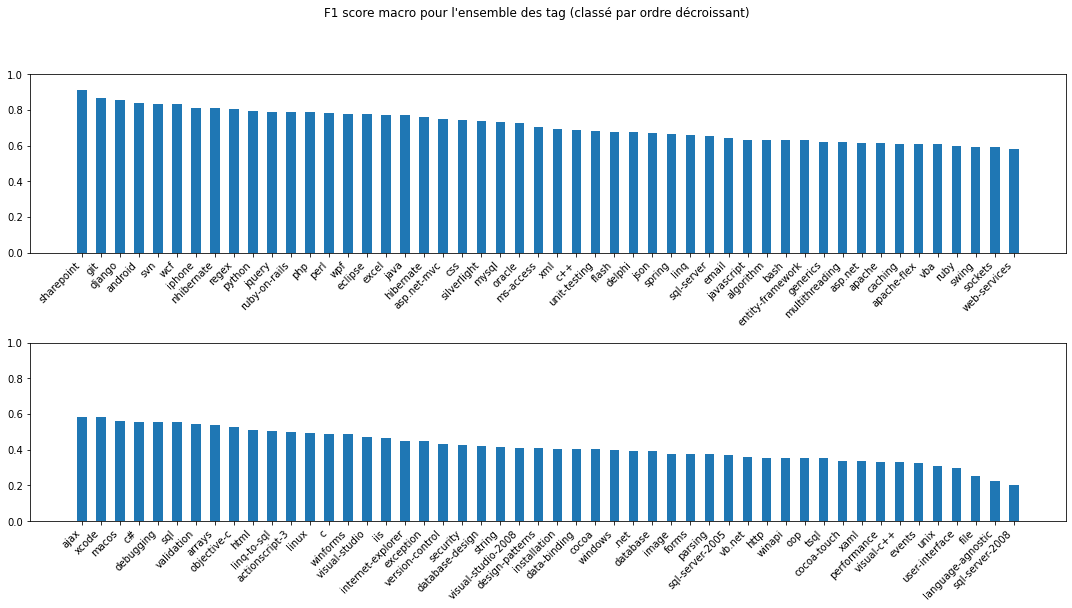

In [25]:
df_result = pd.DataFrame(report).T
df_result = df_result.drop(index=['micro avg', 'macro avg', 'weighted avg', 'samples avg'],
                           columns=['precision', 'recall', 'support'])
df_result = df_result.sort_values(by='f1-score', ascending=False)

row_count = 2
tag_count = 100
fig, axs = plt.subplots(row_count, 1, figsize=(15, row_count * 4))
for idx_row in range(0, row_count):
    len_slice = tag_count / row_count
    slicer = slice(int(idx_row * len_slice), int((idx_row + 1) * len_slice))
    axs[idx_row].bar(df_result[slicer].index,
                     df_result['f1-score'].iloc[slicer],
                     width=0.5)
    axs[idx_row].set_ylim(top=1.)
    axs[idx_row].set_xticklabels(
        df_result[slicer].index, rotation=45, horizontalalignment='right')
fig.suptitle(
    'F1 score macro pour l\'ensemble des tag (classé par ordre décroissant)', y=1.05)
fig.tight_layout()

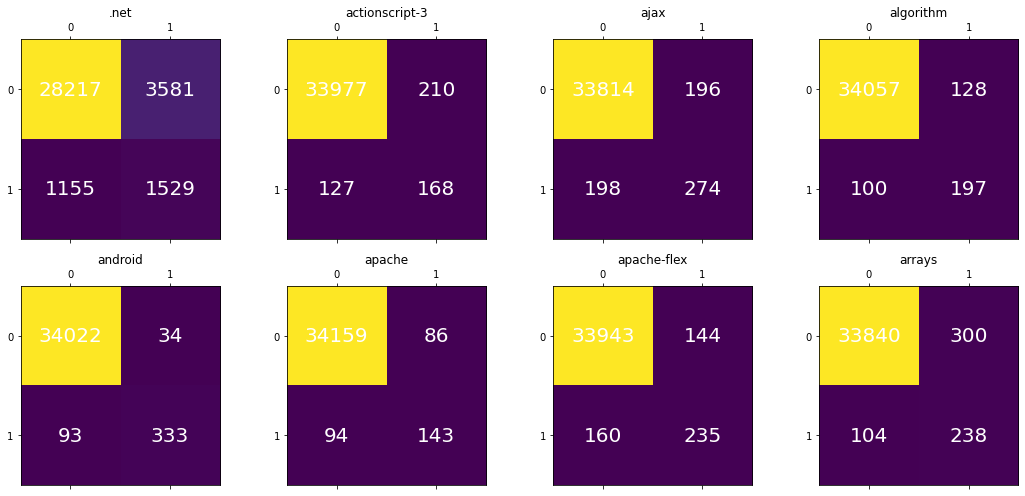

In [26]:
# plot 8 first confusion matrix

rows = 2
cols = 4
fig, axs = plt.subplots(rows, cols, figsize=(15, 7))
for idx_row in range(0, rows):
    for idx_col in range(0, cols):
        idx_tag = idx_col + idx_row * (cols)
        conf_mat = confusion_matrix(Y_true[:, idx_tag], Y_seuil[:, idx_tag])
        axs[idx_row, idx_col].matshow(conf_mat)
        axs[idx_row, idx_col].set_title(tags[idx_tag])
        for i in range(conf_mat.shape[0]):
            for j in range(conf_mat.shape[1]):
                axs[idx_row, idx_col].text(
                    j, i, conf_mat[i, j], ha="center", va="center", color="w", fontsize=20)
fig.tight_layout()